# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline
load_dotenv()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dadslaptop/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key text.latex.preview in file /Users/dadslaptop/opt/anaconda3/envs/pyvizclone/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/dadslaptop/opt/anaconda3/envs/pyvizclone/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg

True

In [2]:
# Read your api key environment variable
api_key = os.getenv('newsapi')


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [4]:
# Fetch the Bitcoin news articles
## get_everything
BTC_news = newsapi.get_everything(q='bitcoin', language="en", sort_by="relevancy")
#BTC_news
print(f"Total articles about Bitcoin News: {BTC_news['totalResults']}")

Total articles about Bitcoin News: 9994


In [5]:
# Fetch the Ethereum news articles
ETH_news = newsapi.get_everything(q="ethereum", language="en", sort_by ="relevancy")

print(f"Total articles about Ethereum: {ETH_news['totalResults']}")

Total articles about Ethereum: 4637


In [6]:
# Create the Bitcoin sentiment scores DataFrame
BTC_sent = []
for article in BTC_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        BTC_sent.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
BTC = pd.DataFrame(BTC_sent)

In [8]:
# Create the Ethereum sentiment scores DataFrame
ETH_sent = []
for article in ETH_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ETH_sent.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
ETH = pd.DataFrame(ETH_sent)

In [10]:
# Describe the Bitcoin Sentiment
BTC.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.091585,0.059550,0.079700,0.860700
std,0.401681,0.062411,0.078177,0.104845
min,-0.859300,0.000000,0.000000,0.557000
25%,-0.381800,0.000000,0.039000,0.827000
50%,-0.162400,0.049000,0.063000,0.888000
75%,0.156025,0.085000,0.103750,0.930250
max,0.750600,0.202000,0.300000,0.964000


In [11]:
# Describe the Ethereum Sentiment
ETH.describe()
#ETH_Summary = ETH.describe()
#ETH_Summary.loc["negative"]

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,-0.055585,0.039550,0.046150,0.91440
std,0.365057,0.055696,0.044724,0.05249
min,-0.690800,0.000000,0.000000,0.82200
25%,-0.273200,0.000000,0.000000,0.86350
50%,-0.127900,0.000000,0.050000,0.93600
75%,0.109025,0.066000,0.068250,0.95425
max,0.690800,0.178000,0.178000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the higher mean positive score

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
sw = list(set(stopwords.words('english')))
# Expand the default stopwords list if necessary
sw.append(["the", "as", "if"])

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    # list(filter) so that we can have the list filter the punctuations.
    words =  word_tokenize(text)
    words = list(filter(lambda T:T not in punctuation, words))
    words = list(filter(lambda T:T.lower(), words))
    words = [lemmatizer.lemmatize(word) for word in words]
    tokens = list(filter(lambda T:T.lower() not in sw, words))
    # Convert the words to lowercase
    
    # Remove the stop words
        # Create a tokenized list of the words
    # Lemmatize words into root words
    
    return tokens

In [15]:
# Create a new tokens column for Bitcoin
BTC["new_tokens"] = BTC.text.apply(tokenizer)
BTC

,text,date,compound,positive,negative,neutral,new_tokens
0,"Now, even though there are a number of women-f...",2022-05-10,0.0772,0.036,0.000,0.964,"[even, though, number, women-focused, crypto, ..."
1,A Bitcoin mining site powered by otherwise los...,2022-05-04,-0.0516,0.056,0.061,0.882,"[Bitcoin, mining, site, powered, otherwise, lo..."
2,Warren Buffett has always been a bitcoin skept...,2022-05-02,-0.3269,0.085,0.143,0.772,"[Warren, Buffett, ha, always, bitcoin, skeptic..."
3,"As a kid, I remember when my father tried to u...",2022-05-16,0.3818,0.114,0.052,0.833,"[kid, remember, father, tried, use, broom, han..."
4,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,0.3400,0.072,0.000,0.928,"[Image, source, Getty, Images, value, Bitcoin,..."
5,If youve ever felt like introducing some Vegas...,2022-05-05,0.7506,0.193,0.000,0.807,"[youve, ever, felt, like, introducing, Vegas-s..."
6,Cryptocurrency mixers are sometimes used to he...,2022-05-06,-0.4404,0.202,0.241,0.557,"[Cryptocurrency, mixer, sometimes, used, help,..."
7,Photo Illustration by Grayson Blackmon / The V...,2022-05-24,-0.4767,0.000,0.103,0.897,"[Photo, Illustration, Grayson, Blackmon, Verge..."
8,"May 11 (Reuters) - Bitcoin fell 7.23% to $28,7...",2022-05-11,-0.3818,0.000,0.077,0.923,"[May, 11, Reuters, Bitcoin, fell, 7.23, 28,758..."
9,"May 4 (Reuters) - Bitcoin rose 5.7% to $39,862...",2022-05-04,-0.2732,0.000,0.063,0.937,"[May, 4, Reuters, Bitcoin, rose, 5.7, 39,862.8..."


In [16]:
# Create a new tokens column for Ethereum
ETH["new_tokens"] = ETH.text.apply(tokenizer)
ETH

,text,date,compound,positive,negative,neutral,new_tokens
0,Meta has revealed more of how NFTs will work o...,2022-05-10,0.6486,0.135,0.000,0.865,"[Meta, ha, revealed, NFTs, work, Instagram, US..."
1,GameStop has officially thrown itself headlong...,2022-05-23,-0.1027,0.000,0.040,0.960,"[GameStop, ha, officially, thrown, headlong, w..."
2,A multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.046,0.075,0.879,"[multi-billion, dollar, cryptocurrency, compan..."
3,When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,-0.2732,0.000,0.055,0.945,"[Bored, Ape, Yacht, Club, creator, Yuga, Labs,..."
4,GameStop is going all-in on crypto. The video ...,2022-05-23,0.1280,0.046,0.000,0.954,"[GameStop, going, all-in, crypto, video, game,..."
5,"DAVOS, Switzerland, May 25 (Reuters) - Ethereu...",2022-05-25,0.0258,0.034,0.000,0.966,"[DAVOS, Switzerland, May, 25, Reuters, Ethereu..."
6,April 26 (Reuters) - Ether has promised to do ...,2022-04-26,0.5346,0.142,0.000,0.858,"[April, 26, Reuters, Ether, ha, promised, bett..."
7,Ethereum is preparing for an upgrade thats bee...,2022-04-26,0.2716,0.065,0.000,0.935,"[Ethereum, preparing, upgrade, thats, describe..."
8,There's a new metaverse project from the creat...,2022-05-01,-0.2732,0.000,0.063,0.937,"['s, new, metaverse, project, creator, ``, Bor..."
9,Editorial IndependenceWe want to help you make...,2022-05-09,0.6908,0.178,0.000,0.822,"[Editorial, IndependenceWe, want, help, make, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
n=2
grams = ngrams(tokenizer(BTC.text.str.cat()), n)
Counter(grams).most_common(10)

[(('world', "'s"), 5),
 (('char', 'May'), 5),
 (('Reuters', 'Bitcoin'), 5),
 (('previous', 'close'), 4),
 (('close', 'Bitcoin'), 4),
 (('Bitcoin', 'world'), 4),
 (("'s", 'biggest'), 4),
 (('biggest', 'best-known'), 4),
 (('best-known', 'cryptocurrency'), 4),
 (('Getty', 'Images'), 2)]

In [19]:
# Generate the Ethereum N-grams where N=2
n=2
grams = ngrams(tokenizer(ETH.text.str.cat()), n)
Counter(grams).most_common(10)

[(('Reuters', 'Bitcoin'), 4),
 (('previous', 'close'), 4),
 (('close', 'Bitcoin'), 4),
 (('Bitcoin', 'world'), 4),
 (('world', "'s"), 4),
 (("'s", 'biggest'), 4),
 (('biggest', 'best-known'), 4),
 (('best-known', 'cryptocurrency'), 4),
 (('char', 'May'), 3),
 (('char', 'GameStop'), 2)]

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
BTC_ALL = tokenizer(BTC.text.str.cat())
token_count(BTC_ALL, 10)

[('char', 19),
 ('Bitcoin', 12),
 ("'s", 11),
 ('cryptocurrency', 10),
 ('world', 6),
 ('week', 6),
 ('Reuters', 6),
 ('May', 5),
 ('biggest', 5),
 ('ha', 4)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
ETH_ALL = tokenizer(ETH.text.str.cat())
token_count(ETH_ALL, 10)

[('char', 20),
 ('cryptocurrency', 10),
 ("'s", 10),
 ('Bitcoin', 10),
 ('ha', 7),
 ('Ethereum', 6),
 ('Reuters', 6),
 ('world', 6),
 ('biggest', 5),
 ('NFT', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

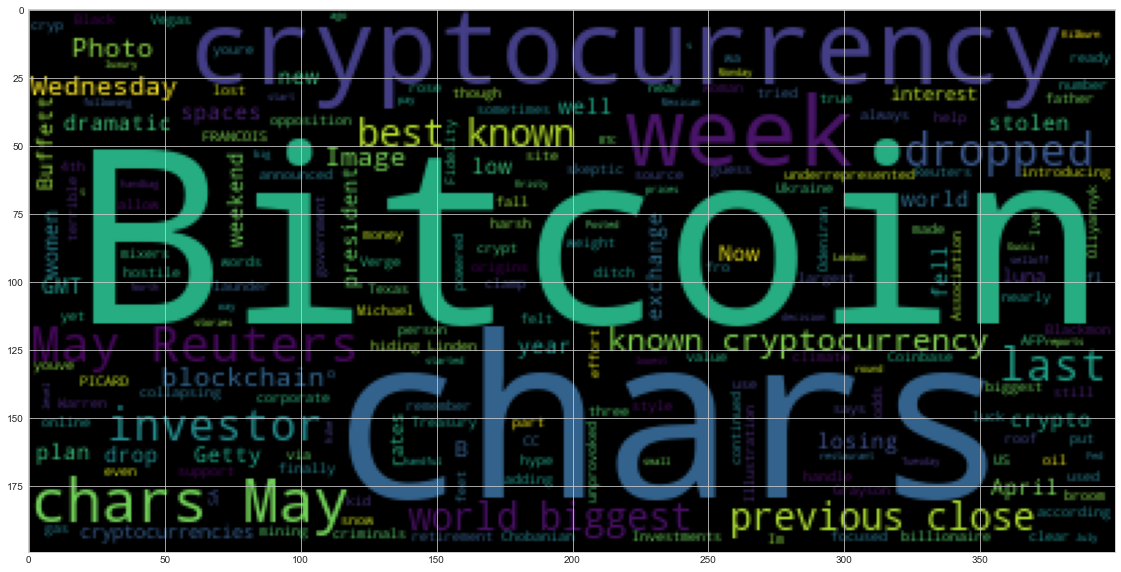

In [24]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(BTC.text.str.cat())
plt.imshow(wc)

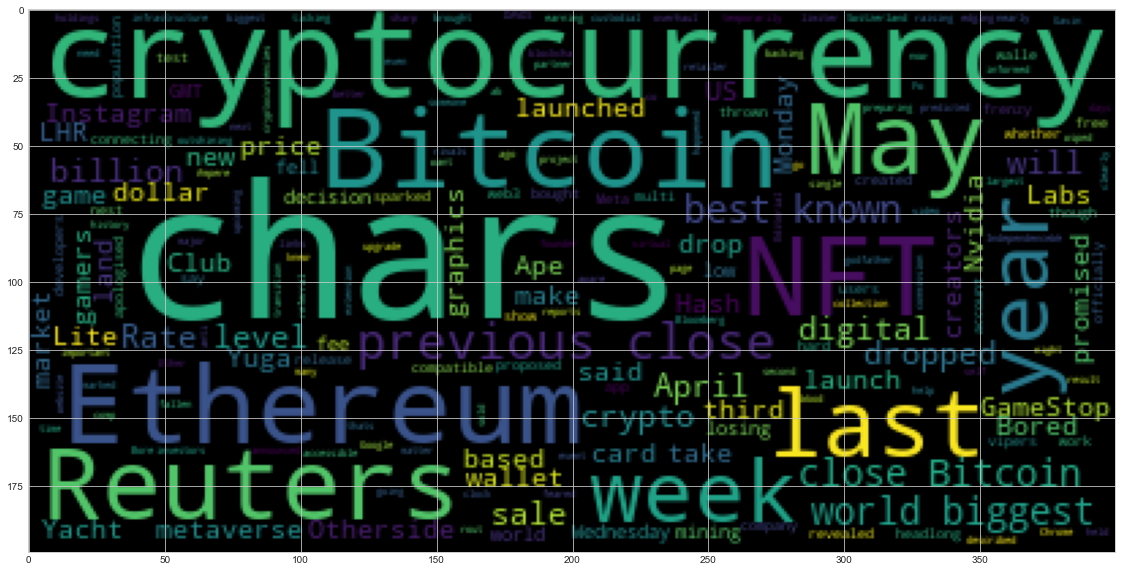

In [25]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ETH.text.str.cat())
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
doc = nlp(BTC.text.str.cat())

In [30]:
# Run the NER processor on all of the text
# Render the visualization

displacy.render(doc, style='ent')

In [42]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'ORG'])

['Meta', 'Bored Ape Yacht Club', 'Yuga Labs', 'NFT', 'Google Chrome', 'Reuters', 'Reuters', 'the "Bored Apes Yacht Club', 'Nvidia', 'Ampere Lite Hash Rate', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'NFT', 'Nvidia', 'LHR', 'Fed', 'NFT']


---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
doc = nlp(ETH.text.str.cat())

In [40]:
# Run the NER processor on all of the text
displacy.render(doc, style='ent')

# Add a title to the document


ALl the Common Words for ETH


In [38]:
# Render the visualization
displacy.render(doc, style='ent')

In [37]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'ORG'])

['Meta', 'Bored Ape Yacht Club', 'Yuga Labs', 'NFT', 'Google Chrome', 'Reuters', 'Reuters', 'the "Bored Apes Yacht Club', 'Nvidia', 'Ampere Lite Hash Rate', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'NFT', 'Nvidia', 'LHR', 'Fed', 'NFT']


---